<a href="https://colab.research.google.com/github/DerrickAmare/DerrickorFloydMayweather/blob/main/ImageRecognition%3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 749.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

ValueError: mount failed

In [ ]:
from fastai.vision.all import *


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/ImagesForTraining'



In [ ]:
# List contents of 'imagesForTraining'
print(f"Contents of 'imagesForTraining': {os.listdir(path)}")


Contents of 'imagesForTraining': ['Derrick', 'Floyd']


In [ ]:
# Define the DataBlock
block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Define that we have images and categories (labels)
    get_items=get_image_files,           # Get all images in the directory
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Split into training and validation
    get_y=parent_label,                  # Get labels from parent folder names
    item_tfms=Resize(128)                # Resize images to 128x128
)

In [ ]:
# Load the data
dls = block.dataloaders('/content/drive/MyDrive/ImagesForTraining')

In [ ]:
# Check if images are being read correctly
derrick_images = get_image_files('/content/drive/MyDrive/ImagesForTraining/Derrick')
floyd_images = get_image_files('/content/drive/MyDrive/ImagesForTraining/Floyd')

print(f"Number of Derrick images: {len(derrick_images)}")
print(f"Number of Floyd images: {len(floyd_images)}")

Number of Derrick images: 17
Number of Floyd images: 10


Number of training batches: 1
Number of validation batches: 1


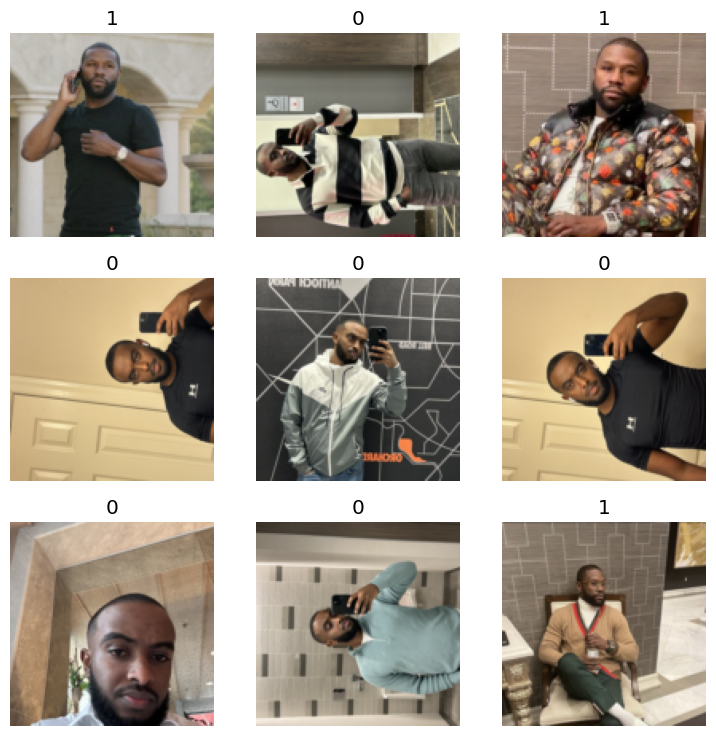

In [ ]:
from fastai.vision.all import *
import os
import pandas as pd

# Define the path to the images
path = Path('/content/drive/MyDrive/ImagesForTraining')

# Load the images manually
derrick_images = get_image_files(path / 'Derrick')
floyd_images = get_image_files(path / 'Floyd')

# Combine both image lists and create corresponding labels
all_images = derrick_images + floyd_images
labels = [0] * len(derrick_images) + [1] * len(floyd_images)

# Create a DataFrame from images and labels
df = pd.DataFrame({
    'image': all_images,
    'label': labels
})

# Create a DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ColReader('image'),
    get_y=ColReader('label'),
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(128),
    batch_tfms=Normalize.from_stats(*imagenet_stats)
)

# Create DataLoader
dls = dblock.dataloaders(df, path=path, bs=16)

# Check the number of batches
print(f"Number of training batches: {len(dls.train)}")
print(f"Number of validation batches: {len(dls.valid)}")

# Show a batch of images
dls.show_batch(max_n=9)



/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 51.9MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.738016,5.213374,0.400000,00:12


epoch,train_loss,valid_loss,accuracy,time
0,1.084869,3.788358,0.400000,00:07
1,0.913011,2.834025,0.400000,00:09
2,0.768337,1.866537,0.400000,00:17
3,0.657421,1.399530,0.600000,00:14


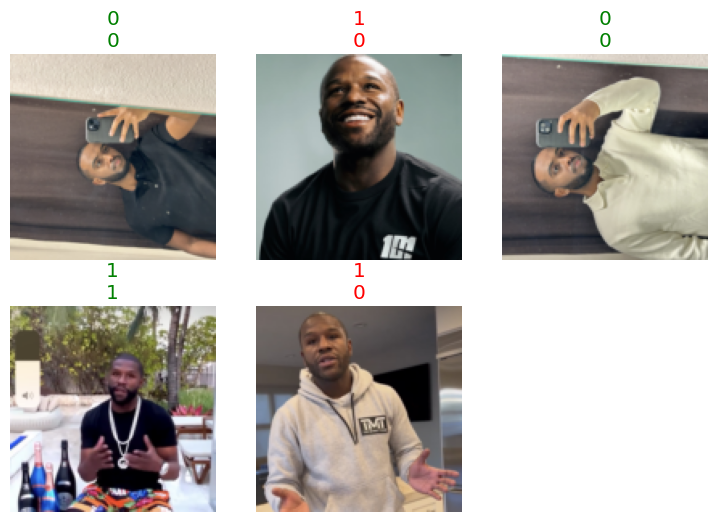

In [ ]:
# Define a CNN architecture and train the model
learn = cnn_learner(dls, resnet34, metrics=accuracy)

# Train the model for a few epochs
learn.fine_tune(4)

# Evaluate the model
learn.show_results()


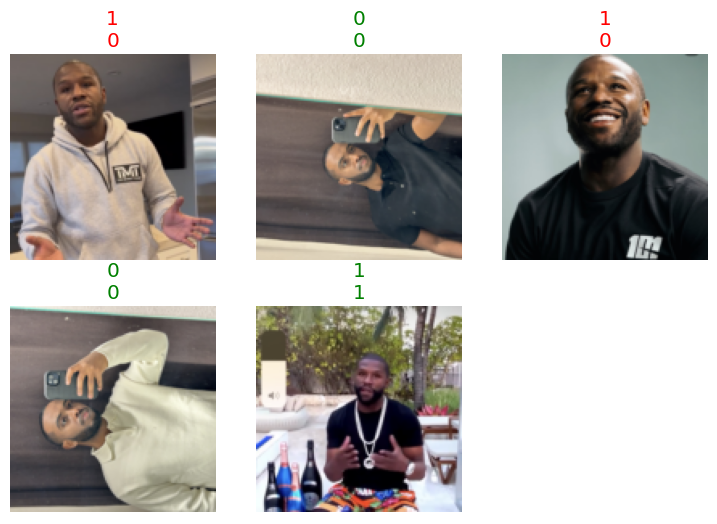

In [ ]:
learn.dls = dls  # Make sure to use the correct dataloaders
learn.validate()  # Validate and calculate metrics
learn.show_results()  # Show results on validation set
